# QUERY 1 : 📥 MEMUAT DAN MEMBERSIHKAN DATA
### Query 1.1 : 🧩 Import library
####  🎯 Tujuan : Mengimpor pustaka (library) yang dibutuhkan untuk analisis data

In [1]:
# Import library yang diperlukan
import pandas as pd                # Mengimpor library Pandas
import numpy as np                 # Mengimpor library NumPy
import matplotlib.pyplot as plt    # Mengimpor modul pyplot dari Matplotlib

### Query 1.2 : 🧾 Memuat Dataset dari File CSV
#### 🎯 Tujuan : Memuat data eksternal green_village_data.csv ke dalam Python agar bisa dianalisis, serta melakukan inspeksi awal terhadap struktur data.

In [2]:
# Memuat dataset dari file CSV ke dalam DataFrame
df = pd.read_csv('green_village_data.csv')

# Inspeksi cepat untuk memastikan data termuat dengan benar
df.head()

,Date,Household_ID,Organic_Waste_kg,Recyclable_Waste_kg,Biogas_Produced_L,Energy_Credits,Total_Waste_kg,Recycle_Ratio,Biogas_Efficiency
0,2025-01-03,H001,4.56,1.23,273.6,138.90,5.79,0.212435,60.0
1,2025-01-05,H002,7.89,3.45,552.3,283.65,11.34,0.304233,70.0
2,2025-01-07,H003,2.34,0.67,128.7,65.85,3.01,0.222591,55.0
3,2025-01-10,H004,6.12,2.89,367.2,189.40,9.01,0.320755,60.0
4,2025-01-12,H005,3.78,1.12,226.8,116.40,4.90,0.228571,60.0


### Query 1.3 : 🗓️ Konversi Tipe Data Tanggal
#### 🎯 Tujuan : Mengubah kolom 'Date' dari tipe teks (string/object) menjadi tipe datetime agar bisa digunakan untuk analisis berbasis waktu seperti:
#### > Tren mingguan/bulanan
#### > Penyaringan data berdasarkan periode
#### > Visualisasi time-series

In [5]:
# Mengonversi kolom 'Date' dari object (teks) ke datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)


Date                   datetime64[ns]
Household_ID                   object
Organic_Waste_kg              float64
Recyclable_Waste_kg           float64
Biogas_Produced_L             float64
Energy_Credits                float64
Total_Waste_kg                float64
Recycle_Ratio                 float64
Biogas_Efficiency             float64
dtype: object


### Query 1.4 : 🛠️ Deteksi dan Imputasi Nilai yang Hilang
#### 🎯 Tujuan : Mendeteksi nilai yang hilang (NaN) dan secara otomatis mengisi kolom numerik dengan rata-rata kolom tersebut agar analisis tetap akurat dan tidak error.

In [6]:
# Deteksi jumlah nilai yang hilang dan isi dengan rata-rata untuk kolom numerik
print("Jumlah nilai hilang SEBELUM imputasi: ")
# Menghitung jumlah nilai NaN di setiap kolom
print(df.isnull().sum())

# Mengisi nilai NaN dengan rata-rata kolom masing-masing
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nJumlah nilai hilang SETELAH imputasi: ")
print(df.isnull().sum())


Jumlah nilai hilang SEBELUM imputasi: 
Date                   0
Household_ID           0
Organic_Waste_kg       0
Recyclable_Waste_kg    0
Biogas_Produced_L      0
Energy_Credits         0
Total_Waste_kg         0
Recycle_Ratio          0
Biogas_Efficiency      0
dtype: int64

Jumlah nilai hilang SETELAH imputasi: 
Date                   0
Household_ID           0
Organic_Waste_kg       0
Recyclable_Waste_kg    0
Biogas_Produced_L      0
Energy_Credits         0
Total_Waste_kg         0
Recycle_Ratio          0
Biogas_Efficiency      0
dtype: int64


# QUERY 2 : 🔬 ANALISIS DAN PERHITUNGAN
###  Query 2.1 : ♻️ Menghitung Total Sampah (Feature Engineering)
#### 🎯 Tujuan : Membuat kolom baru Total_Waste_kg untuk merepresentasikan jumlah total sampah per rumah tangga (baik organik maupun daur ulang), sehingga analisis dapat lebih komprehensif dibanding hanya melihat masing-masing komponen secara terpisah.

In [ ]:
# Membuat fitur baru 'Total_Waste_kg'
df['Total_Waste_kg'] = df['Organic_Waste_kg'] + df['Recyclable_Waste_kg']

# cek hasil penjumlahan total sampah
df[['Organic_Waste_kg', 'Recyclable_Waste_kg', 'Total_Waste_kg']].head()


,Organic_Waste_kg,Recyclable_Waste_kg,Total_Waste_kg
0,4.56,1.23,5.79
1,7.89,3.45,11.34
2,2.34,0.67,3.01
3,6.12,2.89,9.01
4,3.78,1.12,4.90


In [ ]:
# Mengimpor library pandas
import pandas as pd

# Membaca file CSV green_village_data
df = pd.read_csv('green_village_data.csv')

# Inisialisasi kolom kosong dengan tipe data yang sesuai
# gunakan 0.0 agar bertipe float
df['Total_Waste_kg'] = 0.0 
df['Kategori_Sampah'] = ""

# iterasi per baris untuk hitung total dan klasifikasi
for index, row in df.iterrows():
    total = row['Organic_Waste_kg'] + row['Recyclable_Waste_kg']
    # baru set nilainya per baris
    df.at[index, 'Total_Waste_kg'] = total  

    # Klasifikasi volume total
    if total >= 10:
        kategori = "Tinggi"
    else:
        kategori = "Rendah"

    df.at[index, 'Kategori_Sampah'] = kategori

# cetak 5 baris pertama hasilnya
print(df[['Organic_Waste_kg', 'Recyclable_Waste_kg', 'Total_Waste_kg', 'Kategori_Sampah']].head())



   Organic_Waste_kg  Recyclable_Waste_kg  Total_Waste_kg Kategori_Sampah
0              4.56                 1.23            5.79          Rendah
1              7.89                 3.45           11.34          Tinggi
2              2.34                 0.67            3.01          Rendah
3              6.12                 2.89            9.01          Rendah
4              3.78                 1.12            4.90          Rendah


### Query 2.2 : ♻️ Menghitung Rasio Daur Ulang (Recycle Ratio)
#### 🎯 Tujuan : Membuat fitur baru Recycle_Ratio untuk mengetahui berapa proporsi sampah rumah tangga yang bisa didaur ulang dibandingkan total sampah yang dihasilkan. Ini membantu:
#### > Menilai tingkat kesadaran pemilahan sampah
#### > Melihat efektivitas program pengelolaan sampah

In [11]:
# Menghitung rasio sebagai fitur baru
df['Recycle_Ratio'] = df['Recyclable_Waste_kg'] / df['Total_Waste_kg']

# Import library pandas
import pandas as pd

# Baca file CSV green_village_data
df = pd.read_csv('green_village_data.csv')

# Inisialisasi kolom
# gunakan 0.0 agar bertipe float
df['Total_Waste_kg'] = 0.0
df['Kategori_Sampah'] = ""
df['Recycle_Ratio'] = 0.0
# tambahkan kolom baru untuk kategori edukasi
df['Kesadaran_Daur_Ulang'] = "" 

# Proses baris demi baris
for index, row in df.iterrows():
    # Hitung total sampah
    total = row['Organic_Waste_kg'] + row['Recyclable_Waste_kg']
    df.at[index, 'Total_Waste_kg'] = total

    # Kategori volume total
    if total >= 10:
        kategori = "Tinggi"
    else:
        kategori = "Rendah"
    df.at[index, 'Kategori_Sampah'] = kategori

    # Hitung rasio daur ulang (hindari pembagian nol)
    if total > 0:
        recycle_ratio = row['Recyclable_Waste_kg'] / total
    else:
        recycle_ratio = 0.0
    df.at[index, 'Recycle_Ratio'] = recycle_ratio

    # Klasifikasi kesadaran daur ulang
    if recycle_ratio >= 0.5:
        kesadaran = "Sadar Daur Ulang"
    else:
        kesadaran = "Perlu Edukasi"
    df.at[index, 'Kesadaran_Daur_Ulang'] = kesadaran

# cetak hasil
print(df[['Organic_Waste_kg', 'Recyclable_Waste_kg', 'Total_Waste_kg',
          'Recycle_Ratio', 'Kesadaran_Daur_Ulang']].head())



   Organic_Waste_kg  Recyclable_Waste_kg  Total_Waste_kg  Recycle_Ratio  \
0              4.56                 1.23            5.79       0.212435   
1              7.89                 3.45           11.34       0.304233   
2              2.34                 0.67            3.01       0.222591   
3              6.12                 2.89            9.01       0.320755   
4              3.78                 1.12            4.90       0.228571   

  Kesadaran_Daur_Ulang  
0        Perlu Edukasi  
1        Perlu Edukasi  
2        Perlu Edukasi  
3        Perlu Edukasi  
4        Perlu Edukasi  


### Query 2.3 : 🔎 Menghitung Efisiensi Produksi Biogas
#### 🎯 Tujuan : Tujuan dari query ini adalah untuk mengukur efisiensi konversi limbah organik menjadi biogas sebagai indikator keberhasilan program biogas di desa.
#### Dengan menghitung efisiensi produksi biogas, kita ingin menjawab pertanyaan:
#### "Seberapa efektif proses konversi sampah organik menjadi energi di setiap rumah tangga?"

In [ ]:
# impor pandas untuk mengelola data
import pandas as pd
# impor numpay untuk mengelola data
import numpy as np

# Membaca data dari CSV
df = pd.read_csv("green_village_data.csv")


# Menghitung efisiensi, menangani kasus pembagian dengan nol
df['Biogas_Efficiency'] = df['Biogas_Produced_L'] / df['Organic_Waste_kg']

# Mengganti nilai tak terhingga (inf) yang mungkin muncul dengan 0
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Biogas_Efficiency'] = df['Biogas_Efficiency'].fillna(0)

# Inisialisasi kolom kategori
df['Kategori_Efisiensi'] = ""

# Kategorisasi menggunakan if-else
for index, row in df.iterrows():
    efisiensi = row['Biogas_Efficiency']
    
    if efisiensi > 70:
        kategori = "Sangat Efisien"
    elif efisiensi >= 60:
        kategori = "Efisien"
    else:
        kategori = "Kurang Efisien"
    
    df.at[index, 'Kategori_Efisiensi'] = kategori

# cetak hasil 5 baris pertama
print(df[['Organic_Waste_kg', 'Biogas_Produced_L', 'Biogas_Efficiency', 'Kategori_Efisiensi']].head())


   Organic_Waste_kg  Biogas_Produced_L  Biogas_Efficiency Kategori_Efisiensi
0              4.56              273.6               60.0            Efisien
1              7.89              552.3               70.0            Efisien
2              2.34              128.7               55.0     Kurang Efisien
3              6.12              367.2               60.0            Efisien
4              3.78              226.8               60.0            Efisien


### Query 2.4 : ✅ Menampilkan Ringkasan Statistik
#### 🎯 Tujuan : Melakukan Analisis Data Eksplorasi (EDA) awal untuk:
#### > Memahami distribusi data
#### > Menemukan nilai ekstrim (outlier) atau kejanggalan
#### > Mengetahui sebaran nilai: rata-rata, minimum, maksimum, kuartil, dan deviasi standar
#### 💡 Fungsi Penting dari Query Ini:
#### > Melihat apakah Recycle_Ratio > 1 → indikasi kesalahan pembagian
#### > Apakah ada nilai negatif (misal Organic_Waste_kg < 0)
#### > Seberapa stabil efisiensi biogas antar rumah tangga


In [12]:
# impor pandas untuk mengelola data
import pandas as pd
# impor numpy untuk mengelola data
import numpy as np

# Membaca data CSV
df = pd.read_csv("green_village_data.csv")

# Hitung efisiensi produksi biogas
df['Biogas_Efficiency'] = df['Biogas_Produced_L'] / df['Organic_Waste_kg']

# Tangani pembagian nol dan nilai tak terhingga
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Biogas_Efficiency'] = df['Biogas_Efficiency'].fillna(0)

# Inisialisasi kolom kategori
df['Kategori_Efisiensi'] = ""

# Gunakan iterrows dan if-else untuk klasifikasi efisiensi
for index, row in df.iterrows():
    efisiensi = row['Biogas_Efficiency']
    
    if efisiensi >= 70:
        kategori = "Sangat Efisien"
    elif efisiensi >= 60:
        kategori = "Efisien"
    else:
        kategori = "Kurang Efisien"
    
    df.at[index, 'Kategori_Efisiensi'] = kategori

# Menampilkan ringkasan statistik
print("=== Ringkasan Statistik ===")
print(df.describe())

# cetak 5 baris pertama untuk verifikasi
print("\n=== Contoh Data ===")
print(df[['Organic_Waste_kg', 'Biogas_Produced_L', 'Biogas_Efficiency', 'Kategori_Efisiensi']].head())


=== Ringkasan Statistik ===
       Organic_Waste_kg  Recyclable_Waste_kg  Biogas_Produced_L  \
count          50.00000            50.000000          50.000000   
mean            5.49380             2.304800         351.854000   
std             2.04156             1.075346         153.301889   
min             1.89000             0.450000         113.400000   
25%             3.78000             1.450000         226.800000   
50%             5.50500             2.285000         330.300000   
75%             7.20250             3.120000         504.175000   
max             9.12000             4.230000         638.400000   

       Energy_Credits  Total_Waste_kg  Recycle_Ratio  Biogas_Efficiency  
count       50.000000       50.000000      50.000000          50.000000  
mean       180.282000        7.798600       0.285812          62.699877  
std         78.759459        3.102389       0.034048           4.652053  
min         57.700000        2.340000       0.192308          55.000000 

# QUERY 3 : ✨ Visualisasi Data
### Query 3.1 : 📊 Visualisasi Tren Harian Sampah dan Biogas
#### 🎯 Tujuan : Visualisasi Tren Harian
#### 1. Melihat perkembangan sampah dan biogas setiap hari.
#### → Apakah jumlahnya naik, turun, atau stabil?
#### 2. Membandingkan jumlah sampah organik dengan produksi biogas.
#### → Apakah makin banyak sampah, makin banyak biogas?
#### 3. Menemukan hari-hari paling aktif.
#### → Hari mana yang menghasilkan sampah atau biogas paling banyak?

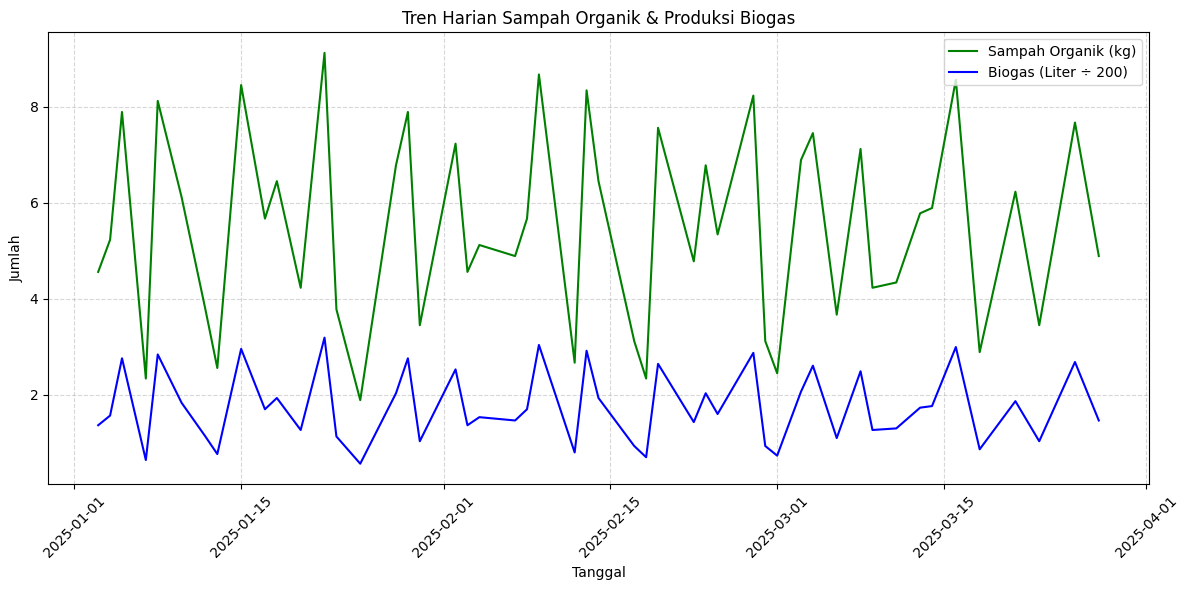

In [13]:
# Import pustaka (library) yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv("green_village_data.csv")

# Pastikan kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menghitung ulang total sampah jika belum ada
df['Total_Waste_kg'] = df['Organic_Waste_kg'] + df['Recyclable_Waste_kg']

# Mengelompokkan data berdasarkan tanggal (agregasi total per hari)
daily_summary = df.groupby('Date').sum(numeric_only=True)

# Membuat grafik garis tren harian
plt.figure(figsize=(12, 6))

# Garis untuk jumlah sampah organik
plt.plot(daily_summary.index,
         daily_summary['Organic_Waste_kg'],
         label='Sampah Organik (kg)',
         color='green')

# Garis untuk produksi biogas (dibagi 200 agar seimbang dengan skala sampah)
plt.plot(daily_summary.index,
         daily_summary['Biogas_Produced_L'] / 200,
         label='Biogas (Liter ÷ 200)',
         color='blue')

# Menambahkan judul dan label
plt.title('Tren Harian Sampah Organik & Produksi Biogas')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan grafik
plt.show()


### Query 3.2 : 🧠 Hubungan Sampah Organik dan Kredit Energi
#### 🎯 Tujuan : 
#### 1. apakah makin banyak sampah organik = makin besar kredit
#### 2. Memahami apakah program insentif efektif mendorong penyetoran sampah.
#### 3. Mendeteksi pola korelasi, apakah titik-titik membentuk garis naik

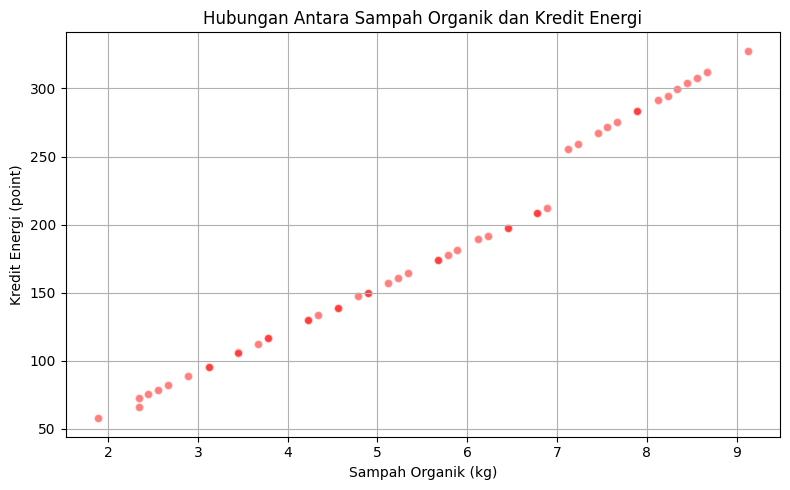

In [14]:
# Import library yang di perlukan
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv("green_village_data.csv")

# Membuat grafik sebar (scatter plot)
plt.figure(figsize=(8, 5))

# Titik-titik hubungan antara sampah organik dan kredit energi
plt.scatter(
    x=df['Organic_Waste_kg'],
    y=df['Energy_Credits'],
    color='red',
    alpha=0.5,      # Transparansi untuk melihat tumpukan data
    edgecolors='w'
)

# Tambahkan judul dan label sumbu
plt.title('Hubungan Antara Sampah Organik dan Kredit Energi')
plt.xlabel('Sampah Organik (kg)')
plt.ylabel('Kredit Energi (point)')
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()


# QUERY 4 : 📦 Menyimpan Hasil
### Query 4.1 : 🧼 Menyimpan Hasil untuk Dampak Jangka Panjang
### 🎯 Tujuan :
#### 1. Menyimpan hasil kerja keras analisis ke file baru agar tidak hilang atau diulang dari awal.
#### 2. Menjaga data bersih dan siap digunakan lagi (untuk visualisasi, laporan, machine learning, atau dashboard).
#### 3. Menghindari menimpa data mentah dengan cara membuat file baru bernama green_village_analyzed.csv.
#### 4. Menyiapkan data agar bisa dibagikan ke tim lain atau digunakan dalam software lain (seperti Excel, Tableau, Power BI).

In [ ]:
import pandas as pd

# Menyimpan DataFrame yang telah diolah ke file CSV baru
df.to_csv('green_village_analyzed.csv', index=False)

# 
# Memberi konfirmasi bahwa file berhasil disimpan
print("DataFrame yang telah dianalisis berhasil disimpan sebagai green_village_analyzed.csv")


DataFrame yang telah dianalisis berhasil disimpan sebagai green_village_analyzed.csv
